<a href="https://colab.research.google.com/github/Mayank300/CLASSWORK-115/blob/main/CLASS_115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FOR PROJECT


In [ ]:
from google.colab import files 
data = files.upload()

In [ ]:
import pandas as pd
import plotly.express as px


df = pd.read_csv('project115.csv')

temp = df['Velocity'].tolist()
melted = df['Escaped'].tolist()

fig = px.scatter(x=temp, y=melted)
fig.show()



In [ ]:
import numpy as np

temp_array = np.array(temp)
melted_array = np.array(melted)


m,c = np.polyfit(temp_array,melted_array,1) 
y = []

for x in temp_array:
  y_values = m*x + c
  y.append(y_values)

fig = px.scatter(x=temp_array, y=melted_array)
fig.update_layout(shapes=[dict(
    type = 'line',
    y0=min(y),
    y1=max(y),
    x0=min(temp_array),
    x1=max(temp_array),
  )])
fig.show()



In [ ]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

X = np.reshape(temp,(len(temp),1))
Y = np.reshape(melted,(len(melted),1))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



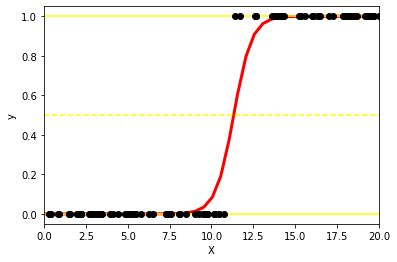

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.reshape(temp, (len(temp), 1))
Y = np.reshape(melted, (len(melted), 1))

lr = LogisticRegression()
lr.fit(X, Y)

plt.figure()
plt.scatter(X.ravel(), Y, color='black', zorder=20)

def model(x):
  return 1 / (1 + np.exp(-x))

#Using the line formula 
X_test = np.linspace(0, 100, 200)
chances = model(X_test * lr.coef_ + lr.intercept_).ravel()

plt.plot(X_test, chances, color='red', linewidth=3)
plt.axhline(y=0, color='yellow', linestyle='-')
plt.axhline(y=1, color='yellow', linestyle='-')
plt.axhline(y=0.5, color='yellow', linestyle='--')

# do hit and trial by changing the value of X_test
plt.axvline(x=X_test[165], color='pink', linestyle='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xlim(0, 20)
plt.show()